# Final Project Template
## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:
Your data must be publically available for free.
Your data should be interesting to you. You want your final project to be something you're proud of.
* Your data should be "big enough":
* It should have at least 1,000 rows.
* It should have enough of columns to be interesting.
* If you have questions, contact a member of the instructional team.


## 2) Provide a link to your data
Your data is required to be free and open to anyone. As such, you should have a URL which anyone can use to download your data:

* Data that I use in this notebook

https://archive.ics.uci.edu/ml/datasets/Adult


### FROM UCI Dataset details

Donor: 

Ronny Kohavi and Barry Becker 
Data Mining and Visualization 
Silicon Graphics. 
e-mail: ronnyk '@' live.com for questions. 


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 


Attribute Information:

### Listing of attributes: 

 

* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
*  fnlwgt: continuous. 
*  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
*  education-num: continuous. 
*  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
*  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
*  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
*  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
*  sex: Female, Male. 
*  capital-gain: continuous. 
*  capital-loss: continuous. 
*  hours-per-week: continuous. 
*  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*  income: >50K, <=50K.


Relevant Papers:

Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996 
[Web Link]


Date and Time this was run:

In [31]:
import datetime
datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S")

'Mon, 25 November 2019 10:29:58'

In [32]:
#Imports as needed
# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
print("Imports:")
print("NumPy: ",np.__version__)
print("Pandas: ",pd.__version__)

Imports:
NumPy:  1.17.3
Pandas:  0.25.3


In [34]:
# List files available
print(os.listdir("."))

['.git', '.ipynb_checkpoints', 'adult.data', 'adult.data.csv', 'adult.names', 'adult.test', 'BIOF_003.ipynb', 'bkup_MR_RD_BIOF509_Final_Project.ipynb', 'Intro_to_ML.ipynb', 'Intro_to_ML_Chp2.ipynb', 'MR_RD_BIOF509_Final_Project.ipynb', 'myheadings', 'Old_final-project.ipynb', 'postBuild', 'README.md', 'requirements.txt', 'Scikit_Learn_Cheat_Sheet_Python.pdf', 'test.csv', 'train.csv', 'UCI Machine Learning Repository: Adult Data Set.webarchive', 'UCI_DataSet_Snapshot.jpg', 'UCI_DataSet_Snapshot.png', 'Untitled.ipynb']



## 3) Import your data

In the space below, import your data. If your data span multiple files, read them all in. 
If applicable, merge or append them as needed.

In [35]:
# Let us setup columns
h =['age', # continuous.
'workclass',# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
'fnlwgt', # continuous.
'education', # Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
'education-num', # continuous.
'marital-status', # Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
'occupation', # Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
'relationship', # Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
'race', # White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
'sex', # Female, Male.
'capital-gain', # continuous.
'capital-loss', # continuous.
'hours-per-week', # continuous.
'native-country', # United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'income' # Over or under 50K    
   ]
# Use index_col to stop age(first column) being used as index column
medData = pd.read_csv('adult.data', names=h, index_col=False) 

# 4) Show me the head of your data.

## 4.1 Describe Data

In [36]:
medData.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [37]:
medData.index

RangeIndex(start=0, stop=32561, step=1)

In [38]:
medData.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [39]:
medData.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [40]:
medData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
# Sample for filtering medData[medData.age > 75]

income
 <=50K    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
 >50K     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

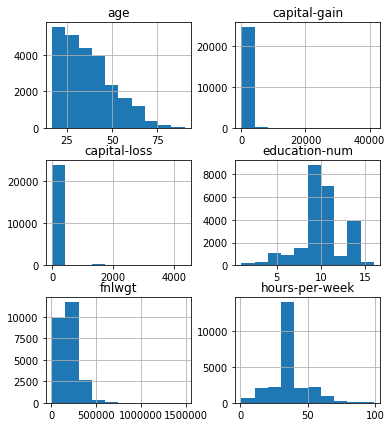

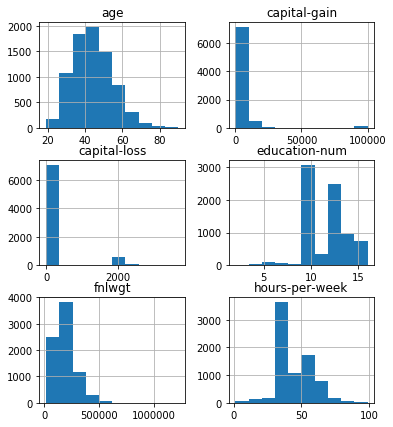

In [42]:
medData.groupby('income').hist(figsize=(6, 7))

# 5) Show me the shape of your data.

In [43]:
medData.shape

(32561, 15)

## 5.1) Unique Values by Column

In [44]:
medData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

# 6) Show me the proportion of missing observations for each column of your data

##    6.1) Show me the proportion of missing observations for each column of your data

* All of the MISSING data is coded as " ?" in the data set


In [45]:
#medData.isin(['?'])[15] # https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe
#medData = medData.replace(" ?", np.NaN)
medData = medData.replace(" ?", np.NaN)

* Replaced " ?" in the data set with np.NaN; count NA values

In [46]:
medData.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [47]:
#df = medData.select_dtypes(include=np.number)

In [48]:
#dir(df)
#df.head()

In [49]:
#sns.heatmap(df.groupby('education-num').mean())

In [50]:
medData

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



# 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.



## 7.1) Let us classify Affluent as income over 50K

In [51]:
X = medData.iloc[:,0:14]
y = medData.iloc[:,14:].replace(" >50K", "Affluent").replace(" <=50K", "Not Affluent")
X.head(), y.head()

(   age          workclass  fnlwgt   education  education-num  \
 0   39          State-gov   77516   Bachelors             13   
 1   50   Self-emp-not-inc   83311   Bachelors             13   
 2   38            Private  215646     HS-grad              9   
 3   53            Private  234721        11th              7   
 4   28            Private  338409   Bachelors             13   
 
         marital-status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital-gain  capital-loss  hours-per-week  native-country  
 0          2174             0              40   United-State

# Question: 
For this 
## * What features of the above data best predict whether or not a person makes over 50K?

In [52]:
df = pd.get_dummies(medData)
df = df.drop('income_ <=50K', axis=1)
df.head
X = df.iloc[:,:105]
y = df.iloc[:,105]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_ >50K, Length: 32561, dtype: uint8

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.7989949748743719

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
#from sklearn.svm import LinearSVC
neighCV = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(neighCV, X, y, cv=6)
cv_results['test_score']

array([0.79546711, 0.79988944, 0.793993  , 0.79473005, 0.79546711,
       0.79561371])

In [55]:
#from sklearn.svm import LinearSVC
neighCV = KNeighborsClassifier(n_neighbors=20)
cv_results = cross_validate(neighCV, X, y, cv=6)
cv_results['test_score']

array([0.79657269, 0.79841533, 0.79767828, 0.79694122, 0.80081076,
       0.79929967])

# 8) What is your y-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

In [56]:
medData.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

## Let's gather Categorical values in a separate DataFrame

In [57]:
OmedData = medData.select_dtypes(include='object')
OmedDataCols = medData.select_dtypes(include='object').columns
CmedData = medData

In [58]:
for i in OmedDataCols:
    w1 = pd.Categorical(OmedData[i])
    print(w1.codes)
    CmedData[i] = (w1.codes.tolist())

[6 5 3 ... 3 3 4]
[ 9  9 11 ... 11 11 11]
[4 2 0 ... 6 4 2]
[0 3 5 ... 0 0 3]
[1 0 1 ... 4 3 5]
[4 4 4 ... 4 4 4]
[1 1 1 ... 0 1 0]
[38 38 38 ... 38 38 38]
[0 0 0 ... 0 0 1]


In [59]:
#w1.codes

In [60]:
CmedData

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [61]:
X = CmedData.iloc[:,:-1]
y = CmedData[CmedData.columns[-1:]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

for i in range(1,101,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    a = accuracy_score(y_test, y_pred)
    print("i:", i, "accuracy:", a)

i: 1 accuracy: 0.7279204028989068
i: 11 accuracy: 0.7851615280678049
i: 21 accuracy: 0.7954796708021128
i: 31 accuracy: 0.7946198255742538
i: 41 accuracy: 0.7932686402161897
i: 51 accuracy: 0.7920402898906769
i: 61 accuracy: 0.7900749293698562
i: 71 accuracy: 0.7876182287188306
i: 81 accuracy: 0.7863898783933178
i: 91 accuracy: 0.7846701879375998
